#week 4#
basic baci data analysis

In [ ]:
# !pip install pandas matplotlib seaborn plotly geopandas folium

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import geopandas as gpd
import folium

# Load data
# df = pd.read_csv('/content/BACI_HS22_Y2023_V202501.csv')
country_codes = pd.read_csv('/content/country_codes_V202501.csv')
product_codes = pd.read_csv('/content/product_codes_HS12_V202501.csv')

import glob

# Define the file path pattern (update path as needed)
file_pattern = "/content/BACI_HS12_Y*_V202501.csv"

# Get a list of all matching files
file_list = glob.glob(file_pattern)

# Read and merge all files
df_list = [pd.read_csv(file) for file in file_list]
df = pd.concat(df_list, ignore_index=True)

df.columns = ['Year', 'Exporter', 'Importer', 'Product', 'Value', 'Quantity']

# Merge country names
df = df.merge(country_codes, left_on='Exporter', right_on='country_code', how='left')
df.rename(columns={'country_name': 'Exporter_Name'}, inplace=True)
df = df.merge(country_codes, left_on='Importer', right_on='country_code', how='left')
df.rename(columns={'country_name': 'Importer_Name'}, inplace=True)


In [ ]:
# # Define semiconductor-related product codes
# semiconductor_product_codes = [854141, 854142, 854143, 854149, 854151, 854159,
#                                852351, 852352, 852359, 848610, 848620, 848640]

# # Filter data for semiconductor-related products
# df = df[df['Product'].isin(semiconductor_product_codes)]

In [ ]:
df

,Year,Exporter,Importer,Product,Value,Quantity,country_code_x,Exporter_Name,country_iso2_x,country_iso3_x,country_code_y,Importer_Name,country_iso2_y,country_iso3_y
0,2023,4,20,200290,8.013,5.830,4,Afghanistan,AF,AFG,20,Andorra,AD,AND
1,2023,4,31,252620,9.808,77.150,4,Afghanistan,AF,AFG,31,Azerbaijan,AZ,AZE
2,2023,4,31,680221,33.788,76.655,4,Afghanistan,AF,AFG,31,Azerbaijan,AZ,AZE
3,2023,4,31,761510,6.604,2.368,4,Afghanistan,AF,AFG,31,Azerbaijan,AZ,AZE
4,2023,4,31,860900,1.500,2.200,4,Afghanistan,AF,AFG,31,Azerbaijan,AZ,AZE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4425870,2023,372,764,902610,17.404,0.022,372,Ireland,IE,IRL,764,Thailand,TH,THA
4425871,2023,372,764,902620,34.127,0.344,372,Ireland,IE,IRL,764,Thailand,TH,THA
4425872,2023,372,764,902680,15.087,0.022,372,Ireland,IE,IRL,764,Thailand,TH,THA
4425873,2023,372,764,902690,4.301,0.004,372,Ireland,IE,IRL,764,Thailand,TH,THA


In [ ]:
product_codes['Product'] = product_codes['code']
product_codes.drop(['code'], axis=1, inplace=True)
product_codes

,description,Product
0,"Horses: live, pure-bred breeding animals",10121
1,"Horses: live, other than pure-bred breeding an...",10129
2,Asses: live,10130
3,Mules and hinnies: live,10190
4,"Cattle: live, pure-bred breeding animals",10221
...,...,...
5604,Collections and collectors' pieces: of numisma...,970531
5605,Collections and collectors' pieces: of numisma...,970539
5606,Antiques: of an age exceeding 250 years,970610
5607,Antiques: of an age exceeding 100 years but no...,970690


In [ ]:
df = df.merge(desc, on="Product", how="left")


In [ ]:
df

,Year,Exporter,Importer,Product,Value,Quantity,country_code_x,Exporter_Name,country_iso2_x,country_iso3_x,country_code_y,Importer_Name,country_iso2_y,country_iso3_y,description
0,2023,4,20,200290,8.013,5.830,4,Afghanistan,AF,AFG,20,Andorra,AD,AND,"Vegetable preparations: tomatoes, (other than ..."
1,2023,4,31,252620,9.808,77.150,4,Afghanistan,AF,AFG,31,Azerbaijan,AZ,AZE,"Steatite: natural, crushed, powdered, whether ..."
2,2023,4,31,680221,33.788,76.655,4,Afghanistan,AF,AFG,31,Azerbaijan,AZ,AZE,"Marble, travertine and alabaster: simply cut o..."
3,2023,4,31,761510,6.604,2.368,4,Afghanistan,AF,AFG,31,Azerbaijan,AZ,AZE,"Aluminium: table, kitchen or other household a..."
4,2023,4,31,860900,1.500,2.200,4,Afghanistan,AF,AFG,31,Azerbaijan,AZ,AZE,Containers: (including containers for transpor...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4425870,2023,372,764,902610,17.404,0.022,372,Ireland,IE,IRL,764,Thailand,TH,THA,Instruments and apparatus: for measuring or ch...
4425871,2023,372,764,902620,34.127,0.344,372,Ireland,IE,IRL,764,Thailand,TH,THA,Instruments and apparatus: for measuring or ch...
4425872,2023,372,764,902680,15.087,0.022,372,Ireland,IE,IRL,764,Thailand,TH,THA,Instruments and apparatus: for measuring or ch...
4425873,2023,372,764,902690,4.301,0.004,372,Ireland,IE,IRL,764,Thailand,TH,THA,Instruments and apparatus: parts and accessori...


In [ ]:
keywords = ["semiconductor", "integrated circuit", "microprocessor", "transistor"]
df = df[df['description'].str.contains('|'.join(keywords), case=False, na=False)]


In [ ]:
df

,Year,Exporter,Importer,Product,Value,Quantity,country_code_x,Exporter_Name,country_iso2_x,country_iso3_x,country_code_y,Importer_Name,country_iso2_y,country_iso3_y,description
284,2023,4,40,852351,1.659,0.014,4,Afghanistan,AF,AFG,40,Austria,AT,AUT,Semiconductor media: solid-state non-volatile ...
1056,2023,4,124,852352,14.054,0.086,4,Afghanistan,AF,AFG,124,Canada,CA,CAN,"Semiconductor media: smart cards, whether or n..."
1072,2023,4,124,854149,0.099,NaN,4,Afghanistan,AF,AFG,124,Canada,CA,CAN,Electrical apparatus: photosensitive semicondu...
1073,2023,4,124,854231,156.050,0.086,4,Afghanistan,AF,AFG,124,Canada,CA,CAN,Electronic integrated circuits: processors and...
1264,2023,4,156,854121,1.926,0.004,4,Afghanistan,AF,AFG,156,China,CN,CHN,"Electrical apparatus: transistors, (other than..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4425790,2023,372,764,854231,555.751,0.240,372,Ireland,IE,IRL,764,Thailand,TH,THA,Electronic integrated circuits: processors and...
4425791,2023,372,764,854232,9.835,0.003,372,Ireland,IE,IRL,764,Thailand,TH,THA,Electronic integrated circuits: memories
4425792,2023,372,764,854233,41.483,0.042,372,Ireland,IE,IRL,764,Thailand,TH,THA,Electronic integrated circuits: amplifiers
4425793,2023,372,764,854239,300.057,0.070,372,Ireland,IE,IRL,764,Thailand,TH,THA,Electronic integrated circuits: n.e.c. in head...


In [ ]:
df.describe()

,Year,Exporter,Importer,Product,Value,Quantity,country_code_x,country_code_y
count,32365.0,32365.000000,32365.000000,32365.000000,3.236500e+04,28847.000000,32365.000000,32365.000000
mean,2023.0,195.475545,446.801421,857419.716638,9.054705e+03,340.693708,195.475545,446.801421
std,0.0,103.040203,248.007025,13654.242003,2.342924e+05,10012.660749,103.040203,248.007025
min,2023.0,4.000000,4.000000,848610.000000,1.000000e-03,0.001000,4.000000,4.000000
25%,2023.0,120.000000,231.000000,852352.000000,1.199000e+00,0.007000,120.000000,231.000000
50%,2023.0,203.000000,440.000000,854143.000000,1.134100e+01,0.073000,203.000000,440.000000
75%,2023.0,276.000000,688.000000,854232.000000,1.560500e+02,1.475000,276.000000,688.000000
max,2023.0,372.000000,894.000000,903141.000000,2.247069e+07,987955.547000,372.000000,894.000000


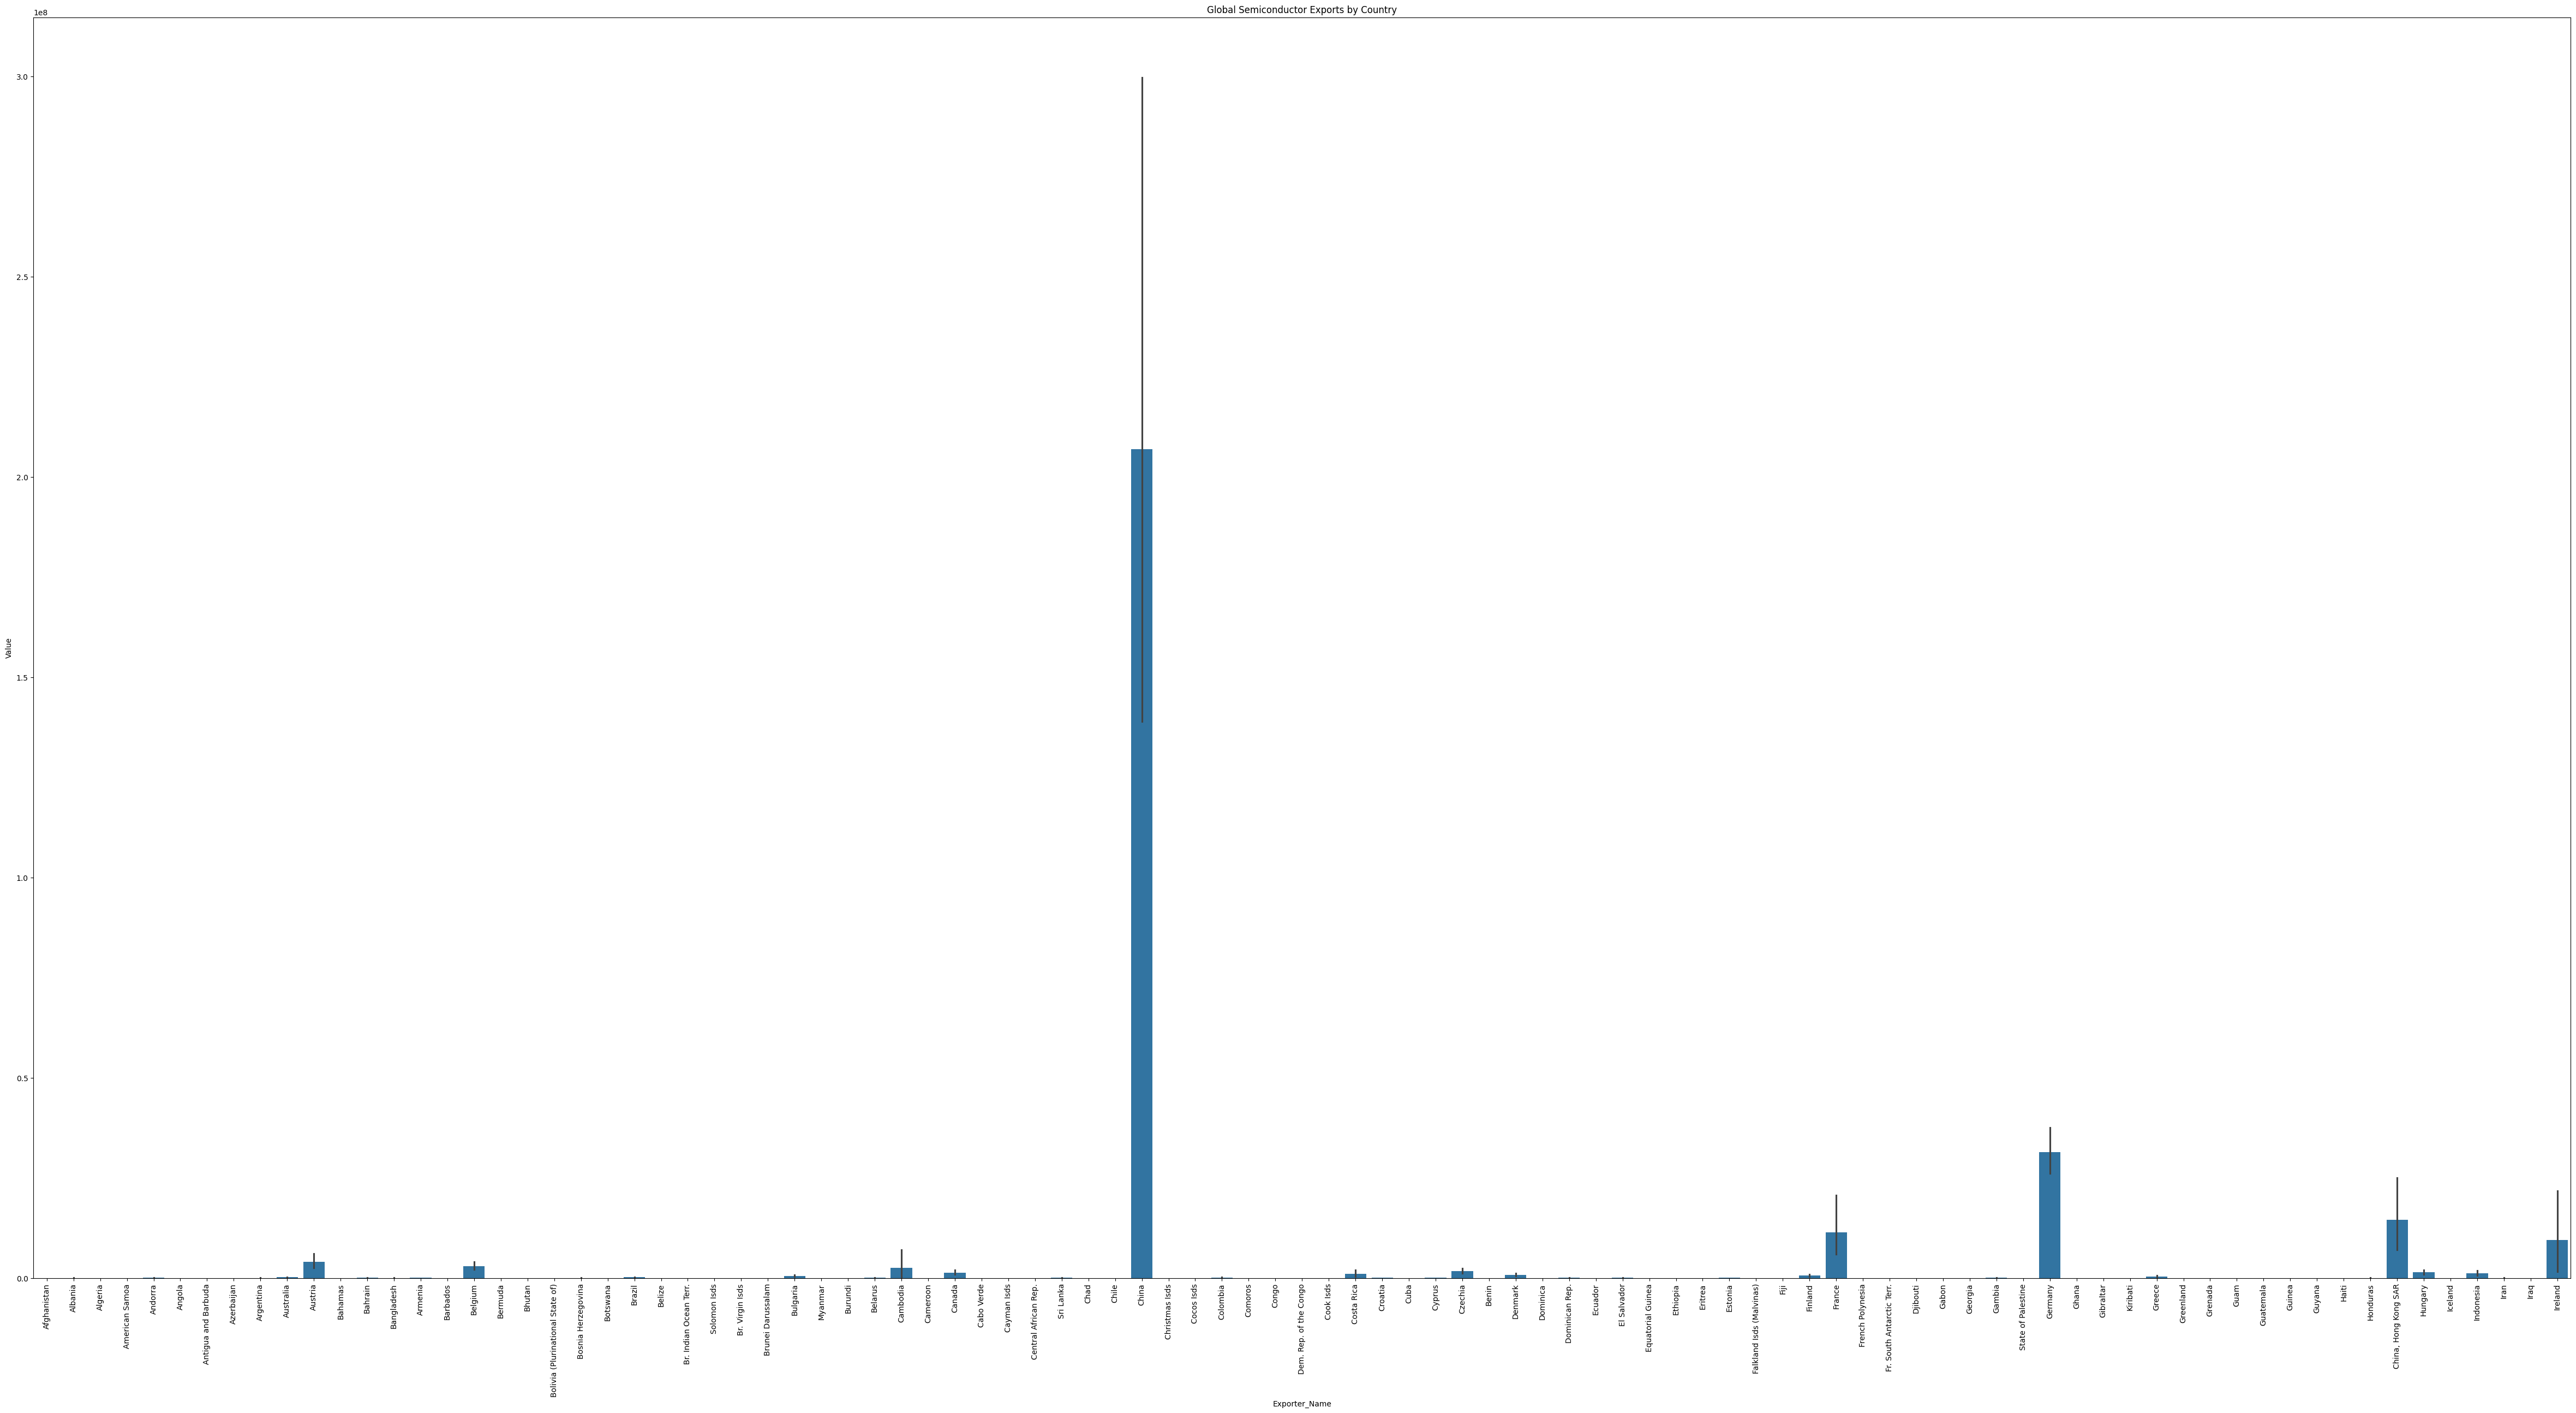

In [ ]:
plt.figure(figsize=(60, 30))
sns.barplot(x='Exporter_Name', y='Value', data=df, estimator=sum)
plt.xticks(rotation=90)
plt.title('Global Semiconductor Exports by Country')
plt.show()


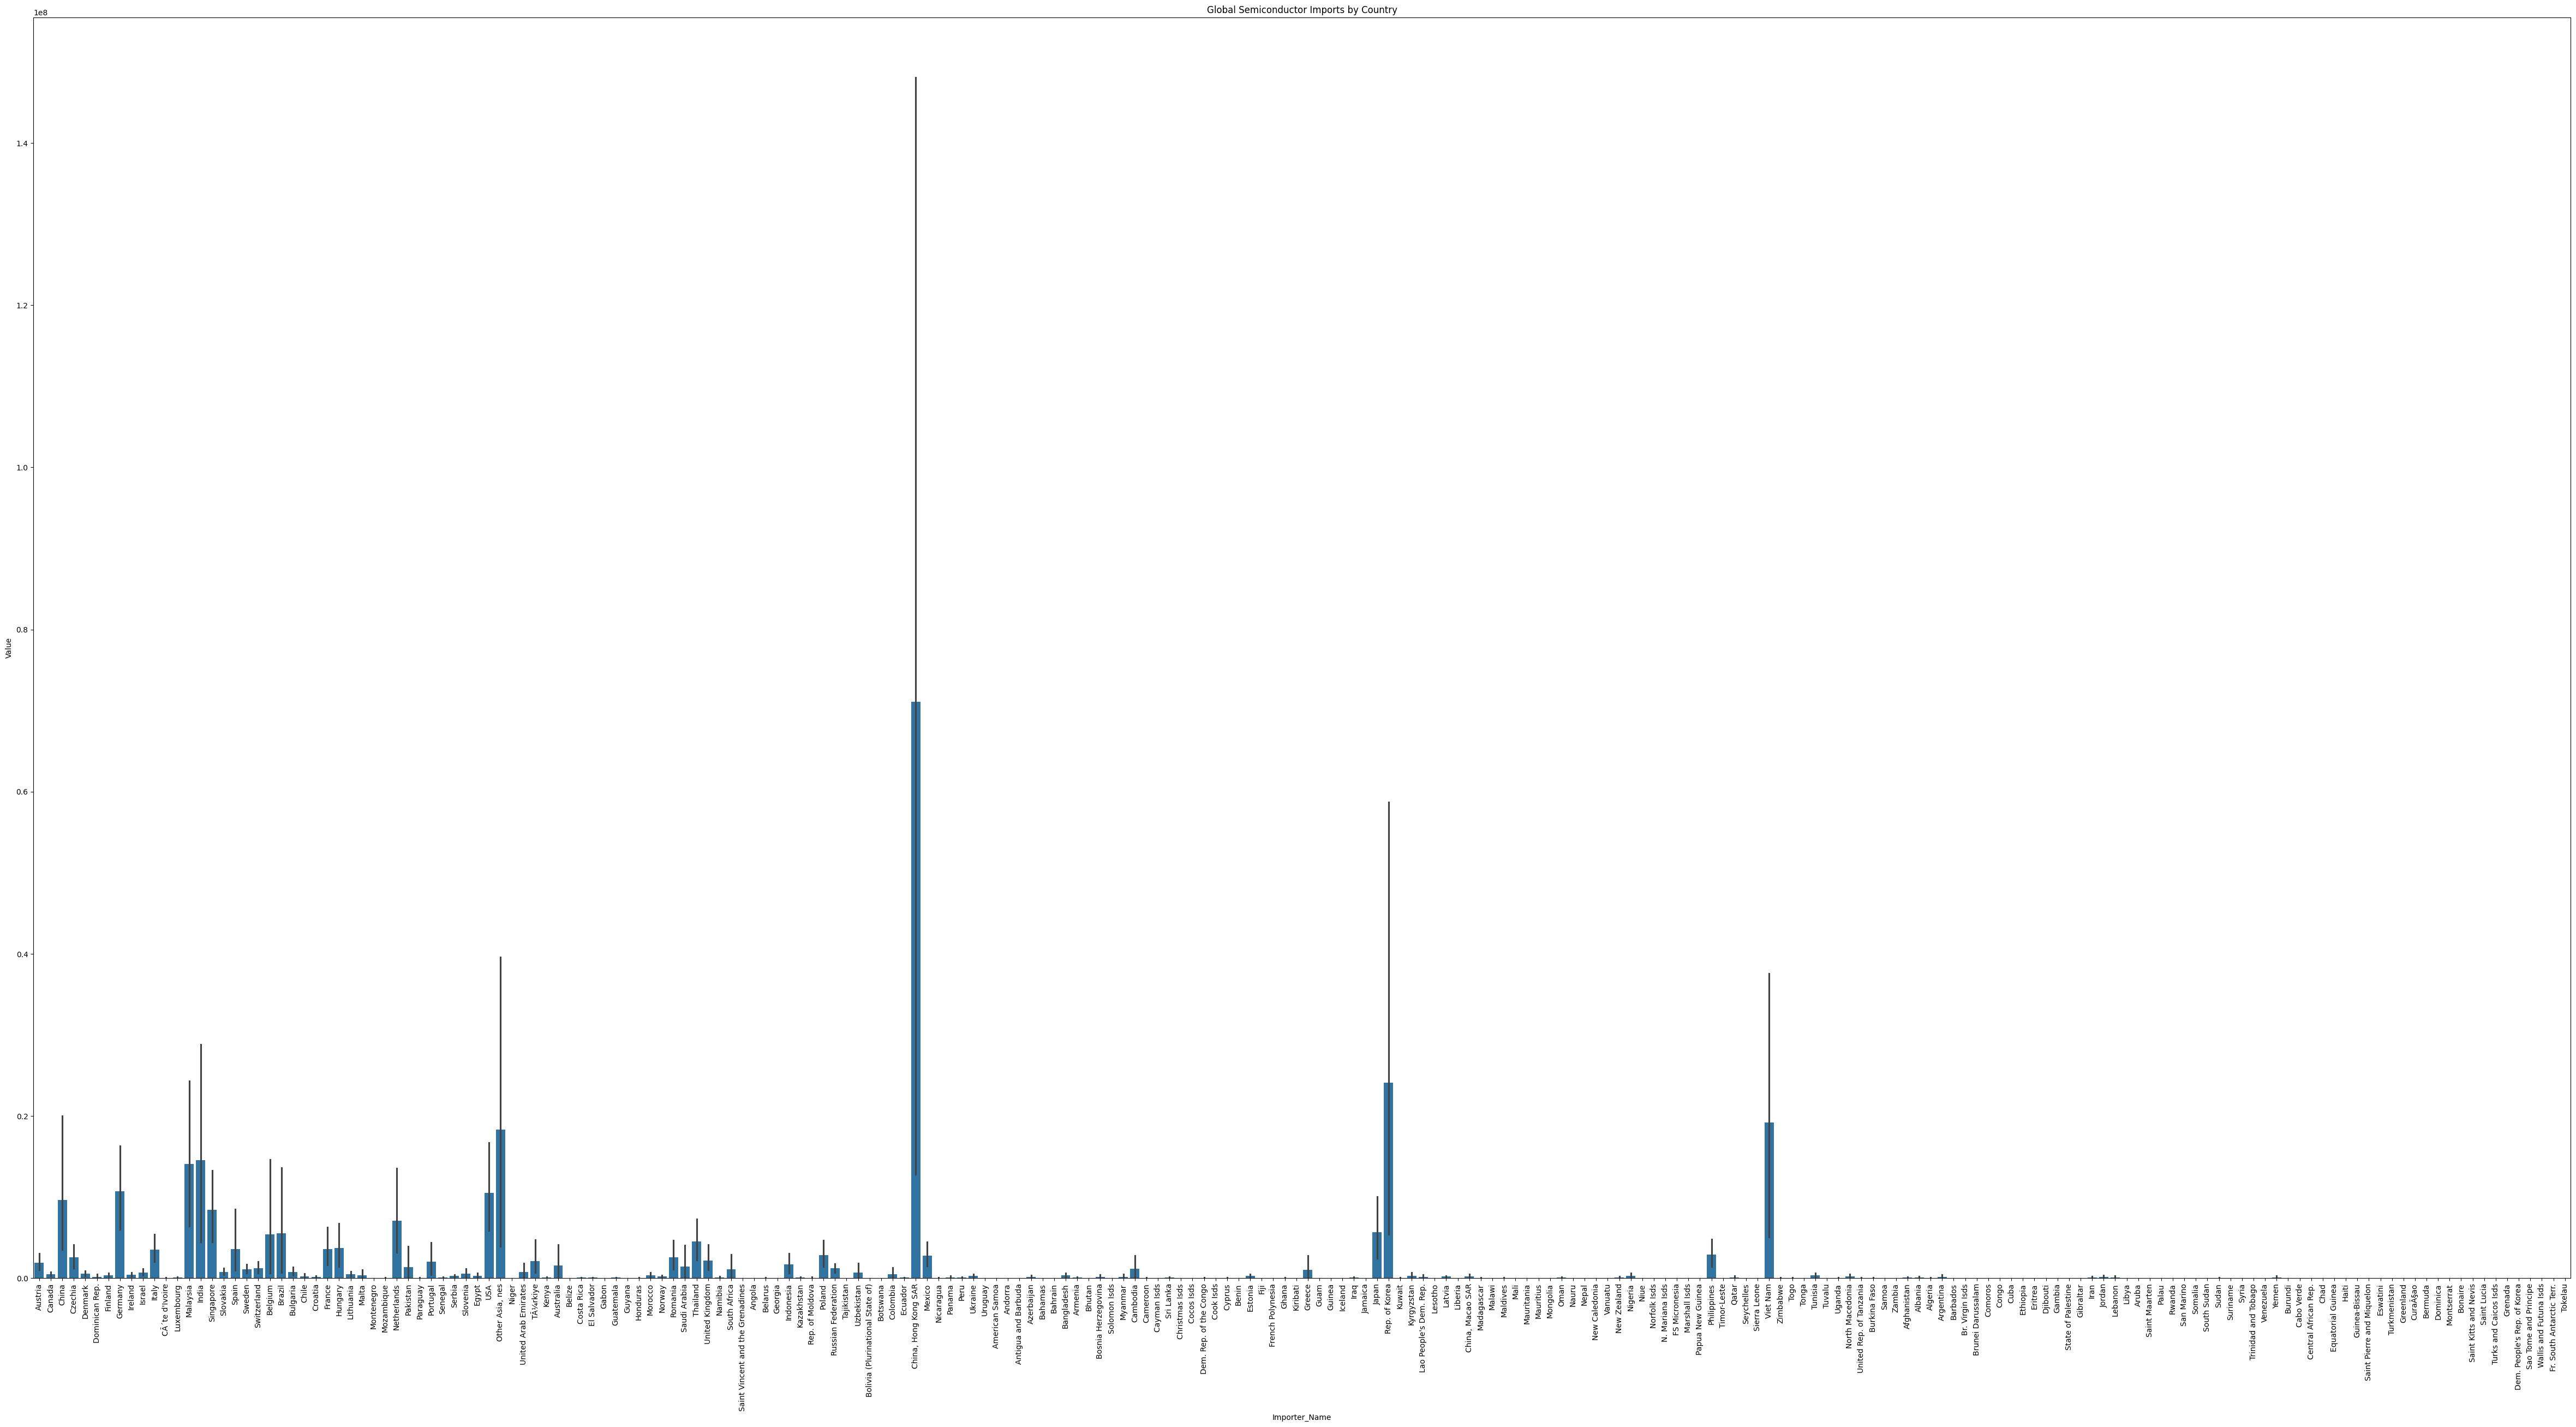

In [ ]:
plt.figure(figsize=(60, 30))
sns.barplot(x='Importer_Name', y='Value', data=df, estimator=sum)
plt.xticks(rotation=90)
plt.title('Global Semiconductor Imports by Country')
plt.show()


In [ ]:

# from geopy.geocoders import Nominatim


# # Initialize geolocator
# geolocator = Nominatim(user_agent="geoapiExercises")
# location_cache = {}

# def get_country_location(country_name):
#     if country_name in location_cache:
#         return location_cache[country_name]
#     try:
#         location = geolocator.geocode(country_name)
#         if location:
#             location_cache[country_name] = (location.latitude, location.longitude)
#             return location.latitude, location.longitude
#     except:
#         return None
#     return None

# # Create trade map
# trade_map = folium.Map(location=[20, 0], zoom_start=2)

# for _, row in df.iterrows():
#     exporter_coords = get_country_location(row['Exporter_Name'])
#     importer_coords = get_country_location(row['Importer_Name'])

#     if exporter_coords and importer_coords:
#         folium.PolyLine(
#             [exporter_coords, importer_coords],
#             color='blue',
#             weight=2.5,
#             opacity=0.7,
#             popup=f"{row['Exporter_Name']} → {row['Importer_Name']}: ${row['Value']}k"
#         ).add_to(trade_map)

# trade_map.save("semiconductor_trade_map.html")

In [ ]:

# Forecasting trade trends
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

df = df.dropna()
X = df[['Year', 'Exporter',	'Importer',	'Product' , 'Quantity']]
y = df['Value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)


predicted_value = model.predict(future_year)
print(f'Predicted Semiconductor Trade Value for 2025: {predicted_value[0]}')


ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- Exporter
- Importer
- Product
- Quantity
